# Import Modules

In [9]:
!pip install --upgrade xlrd
!pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.2 MB 5.1 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split

# Import Dataset

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# from google.colab import files
# uploaded = files.upload()

df = pd.read_excel('/content/dataset.xls', header = 1)
df = df.rename(columns = {'default payment next month': 'Default'})

# Pre-processing

In [4]:
df.isnull().sum()
df = df.drop(['ID'], axis = 1)

In [5]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Encode categorical variables to ONE-HOT

In [6]:
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

df = pd.get_dummies(df, columns = categorical_columns)

In [ ]:
columns_to_scale = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5'
    , 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

df[columns_to_scale]=df[columns_to_scale].apply(lambda x: (x-x.min())/(x.max()-x.min()))

## Split in 75% train and 25% test set

In [8]:
train, test_df = train_test_split(df, test_size = 0.15, random_state= 1984)
train_df, dev_df = train_test_split(train, test_size = 0.15, random_state= 1984)

In [14]:
train_df.Default.sum()/train_df.shape[0]

0.22108419838523644

In [ ]:
dev_df.Default.sum()/dev_df.shape[0] 
test_df.Default.sum()/test_df.shape[0]

In [15]:
train_y = train_df.Default
dev_y = dev_df.Default
test_y = test_df.Default

In [16]:
train_x = train_df.drop(['Default'], axis = 1)
dev_x = dev_df.drop(['Default'], axis = 1)
test_x = test_df.drop(['Default'], axis = 1)

In [17]:
train_x =np.array(train_x)
dev_x =np.array(dev_x)
test_x = np.array(test_x)

train_y = np.array(train_y)
dev_y = np.array(dev_y)
test_y = np.array(test_y)


# Build the AutoEncoder

In [18]:
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout, Input
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn import preprocessing

## Input Layer

In [19]:
input_data = Input(shape=(train_x.shape[1],))

## Encoding Layer

In [21]:
encoding_dim = 16
encoded = Dense(encoding_dim, activation='elu')(input_data)

## Decoding Layer

In [22]:
decoded = Dense(train_x.shape[1], activation='sigmoid')(encoded)

## Autoencoder Model initialization and compilation

In [23]:
autoencoder = Model(input_data, decoded)

In [24]:
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy')

In [25]:
hist_auto = autoencoder.fit(train_x, train_x,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(dev_x, dev_x))

Epoch 1/50
85/85 [==============================] - 1s 9ms/step - loss: -167468320.0000 - val_loss: -483665056.0000
Epoch 2/50
85/85 [==============================] - 0s 5ms/step - loss: -1390427904.0000 - val_loss: -2489397248.0000
Epoch 3/50
85/85 [==============================] - 0s 5ms/step - loss: -4947422208.0000 - val_loss: -7404058624.0000
Epoch 4/50
85/85 [==============================] - 0s 5ms/step - loss: -11853034496.0000 - val_loss: -15260353536.0000
Epoch 5/50
85/85 [==============================] - 0s 5ms/step - loss: -21731616768.0000 - val_loss: -25641990144.0000
Epoch 6/50
85/85 [==============================] - 0s 5ms/step - loss: -34279550976.0000 - val_loss: -38766178304.0000
Epoch 7/50
85/85 [==============================] - 0s 5ms/step - loss: -49985507328.0000 - val_loss: -54890663936.0000
Epoch 8/50
85/85 [==============================] - 0s 5ms/step - loss: -68907393024.0000 - val_loss: -73898606592.0000
Epoch 9/50
85/85 [==============================

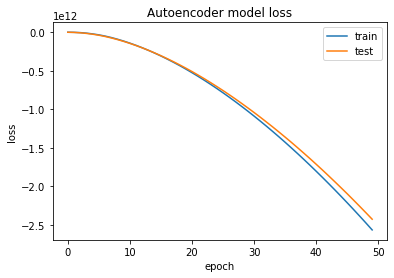

In [26]:
plt.figure()
plt.plot(hist_auto.history['loss'])
plt.plot(hist_auto.history['val_loss'])
plt.title('Autoencoder model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


# Model to make encodings

In [27]:
encoder = Model(input_data, encoded)
encoded_input = Input(shape=(encoding_dim,))

## Last Layer of Autoencoder model

In [28]:
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

## Encode and Decode our test set

In [29]:
encoded_x = encoder.predict(test_x)
decoded_output = decoder.predict(encoded_x)

141/141 [==============================] - 1s 4ms/step


# Model using encoded data

In [30]:
encoded_train_x = encoder.predict(train_x)
encoded_test_x = encoder.predict(test_x)

141/141 [==============================] - 0s 2ms/step


In [31]:
model = Sequential()
model.add(Dense(16, input_dim=encoded_train_x.shape[1],
                kernel_initializer='normal',
                #kernel_regularizer=regularizers.l2(0.02),
                activation="relu"
                )
          )
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss="binary_crossentropy", optimizer='adam')

In [32]:
history = model.fit(encoded_train_x, train_y, validation_split=0.2, epochs=10, batch_size=64)

Epoch 1/10
271/271 [==============================] - 1s 3ms/step - loss: 48288.5938 - val_loss: 0.6607
Epoch 2/10
271/271 [==============================] - 1s 2ms/step - loss: 0.6328 - val_loss: 0.6088
Epoch 3/10
271/271 [==============================] - 1s 3ms/step - loss: 0.5908 - val_loss: 0.5760
Epoch 4/10
271/271 [==============================] - 1s 3ms/step - loss: 0.5643 - val_loss: 0.5556
Epoch 5/10
271/271 [==============================] - 1s 3ms/step - loss: 0.5480 - val_loss: 0.5432
Epoch 6/10
271/271 [==============================] - 1s 3ms/step - loss: 0.5384 - val_loss: 0.5363
Epoch 7/10
271/271 [==============================] - 1s 3ms/step - loss: 0.5331 - val_loss: 0.5325
Epoch 8/10
271/271 [==============================] - 1s 2ms/step - loss: 0.5303 - val_loss: 0.5307
Epoch 9/10
271/271 [==============================] - 1s 3ms/step - loss: 0.5290 - val_loss: 0.5299
Epoch 10/10
271/271 [==============================] - 1s 2ms/step - loss: 0.5284 - val_loss: 0.

## Plot for loss

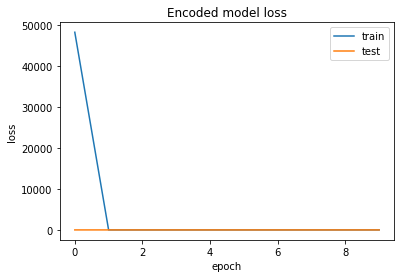

In [33]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Encoded model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


# Predictions and Visualizations

In [34]:
predictions_NN_prob = model.predict(encoded_test_x)

141/141 [==============================] - 0s 2ms/step


## 0-1 probability output

In [35]:
predictions_NN_prob = predictions_NN_prob[:,0]

predictions_NN_01 = np.where(predictions_NN_prob > 0.5, 1, 0)

## Accuracy check

In [36]:
acc_NN = accuracy_score(test_y, predictions_NN_01)
print('Overall accuracy of Neural Network model:', acc_NN)

Overall accuracy of Neural Network model: 0.7831111111111111


## ROC Curve

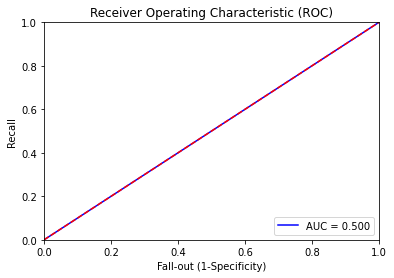

In [37]:
false_positive_rate, recall, thresholds = roc_curve(test_y, predictions_NN_prob)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

## Confusion Matrix

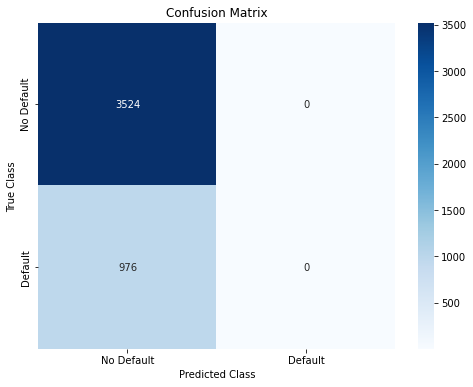

In [38]:
cm = confusion_matrix(test_y, predictions_NN_01)
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()